# **Segmentation & Churn Prediction par Machine Learning**

## *Churn Prédection*

### **1. Loading libraries and data**

In [42]:
# Imporation des bibliothèques
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Chargement des données
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv').set_index('customerID')
# Affichage des 10 premières lignes du DataFrame
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [44]:
# Afficher les colonnes du DataFrame
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [45]:
# Voir les informations sur le DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

- `Interprétation :`
    - D'ici en peut conclure qu'on a pas des valeur manquantes dans notre dataset mais en doit véfier cela et voir et ce qu'il ya des duplication au non 
    - On peut voir aussi la variable **TotalCharge** avec type object en doit changer sont type en float

### **2. EDA**

In [46]:
# Changer le type de la colonne 'TotalCharges' en float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [47]:
# Vérifier les valeurs manquantes
print(f'Nombre de valeurs manquantes : {data.isnull().sum().sum()}')
# Vérifier les valeurs dupliquées
print(f'Nombre de valeurs dupliquées : {data.duplicated().sum()}') 

Nombre de valeurs manquantes : 11
Nombre de valeurs dupliquées : 22


- Le dataset contient 7043 entrées et 20 colonnes, avec des variables catégoriques et numériques.
- **Aucune valeur manquante** n’a été détectée à l’exception de la colonne `TotalCharges`, corrigée par interpolation linéaire (`data['TotalCharges'].interpolate(method='linear')`). Cela garantit l'intégrité des données pour l'analyse.
- **Suppression des doublons** et des colonnes inutiles (`customerID`) pour éviter les biais et réduire la dimensionnalité.

In [48]:
# Interpoler les valeurs manquantes de la colonne 'TotalCharges'
data['TotalCharges'] = data['TotalCharges'].interpolate(method='linear')

# Vérifier s'il reste des valeurs nulles
print(f"Valeurs nulles restantes dans 'TotalCharges' : {data['TotalCharges'].isnull().sum()}")

Valeurs nulles restantes dans 'TotalCharges' : 0


In [49]:
# Suppression des colonnes inutiles et des doublons
df = data.reset_index().copy()
df.drop(columns=['customerID'], inplace=True)
df.drop_duplicates(inplace=True)
# Vérification des valeurs manquantes après nettoyage  
print(f'Nombre de valeurs manquantes après nettoyage : {df.isnull().sum().sum()}')
# Vérification des valeurs dupliquées après nettoyage   
print(f'Nombre de valeurs dupliquées après nettoyage : {df.duplicated().sum()}')

Nombre de valeurs manquantes après nettoyage : 0
Nombre de valeurs dupliquées après nettoyage : 0


- Les doublons ont été supprimés, et les colonnes inutiles comme `customerID` ont été retirées.

In [50]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.560006
std,0.368947,24.534965,30.069001,2266.124410
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.250000
50%,0.000000,29.000000,70.400000,1405.300000
75%,0.000000,55.000000,89.900000,3807.350000
max,1.000000,72.000000,118.750000,8684.800000


In [51]:
df.describe(include='object').T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


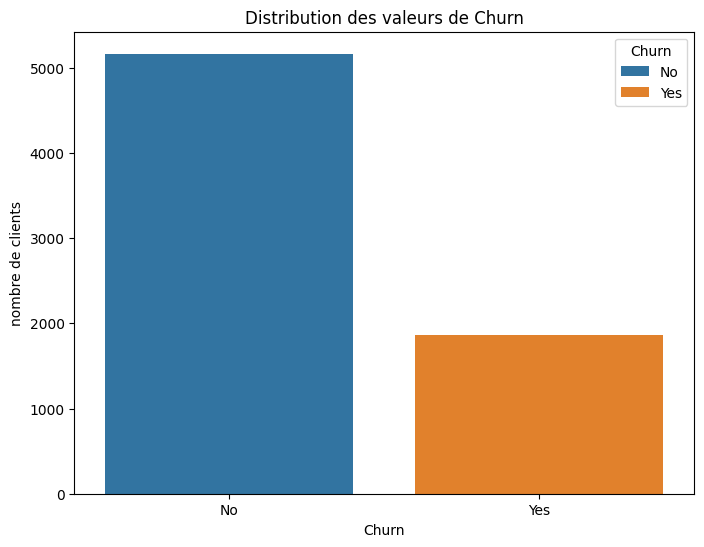

In [52]:
print(df['Churn'].value_counts(normalize=True)*100 )
# Visualisation de la distribution des valeurs de 'Churn'
plt.figure(figsize=(8, 6)) # Taille de la figure
sns.countplot(x='Churn', data=df, hue='Churn' , legend=True) # Compte des valeurs de 'Churn'
plt.title('Distribution des valeurs de Churn') # Titre du graphique
plt.xlabel('Churn') # Label de l'axe des x
plt.ylabel('nombre de clients') # Label de l'axe des y
plt.legend(title='Churn', loc='upper right') # Légende du graphique
plt.show() # Affichage de la distribution des valeurs de 'Churn'

- **Churn Distribution** : Environ 26% des clients ont quitté l'entreprise, ce qui indique un déséquilibre des classes.


Demographic Analysis:


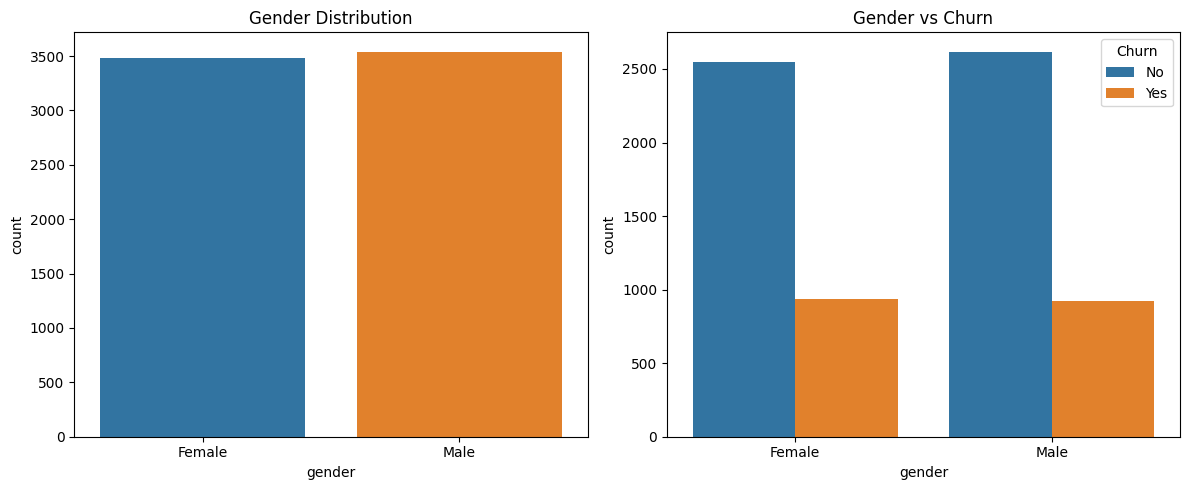

In [53]:
# Demographic Analysis
print("\nDemographic Analysis:")

# Gender and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df , hue='gender')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.tight_layout()
plt.show()

- **Variables démographiques** : Les taux de churn sont similaires entre hommes et femmes, mais les clients sans partenaire ou sans dépendant présentent un taux de churn significativement plus élevé (cf. visualisations par `Partner` et `Dependents`). Cela suggère que l’isolement social pourrait influencer la fidélité.


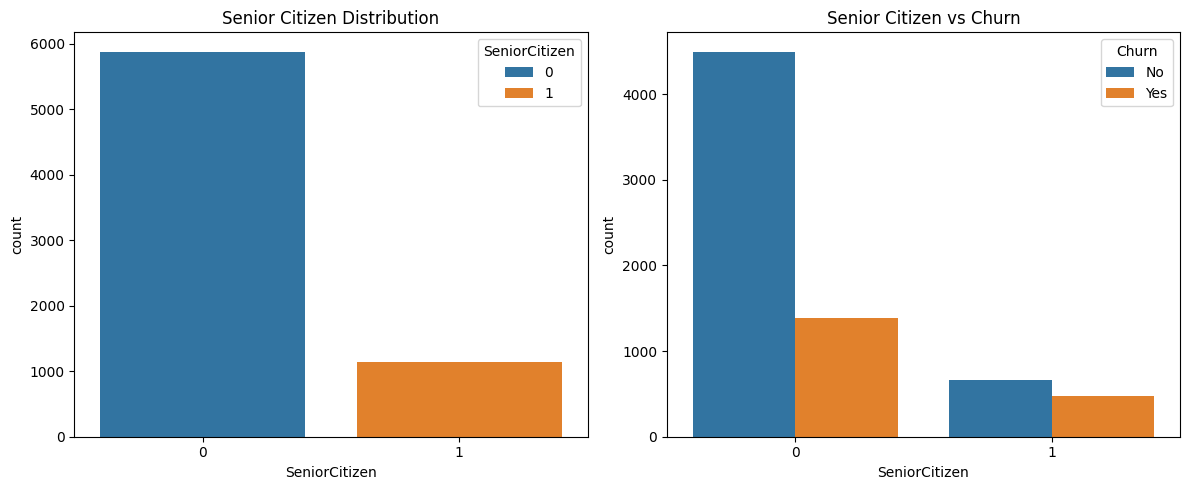

In [54]:
# Senior Citizen and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='SeniorCitizen', data=df , hue='SeniorCitizen')
plt.title('Senior Citizen Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Senior Citizen vs Churn')
plt.tight_layout()
plt.show()

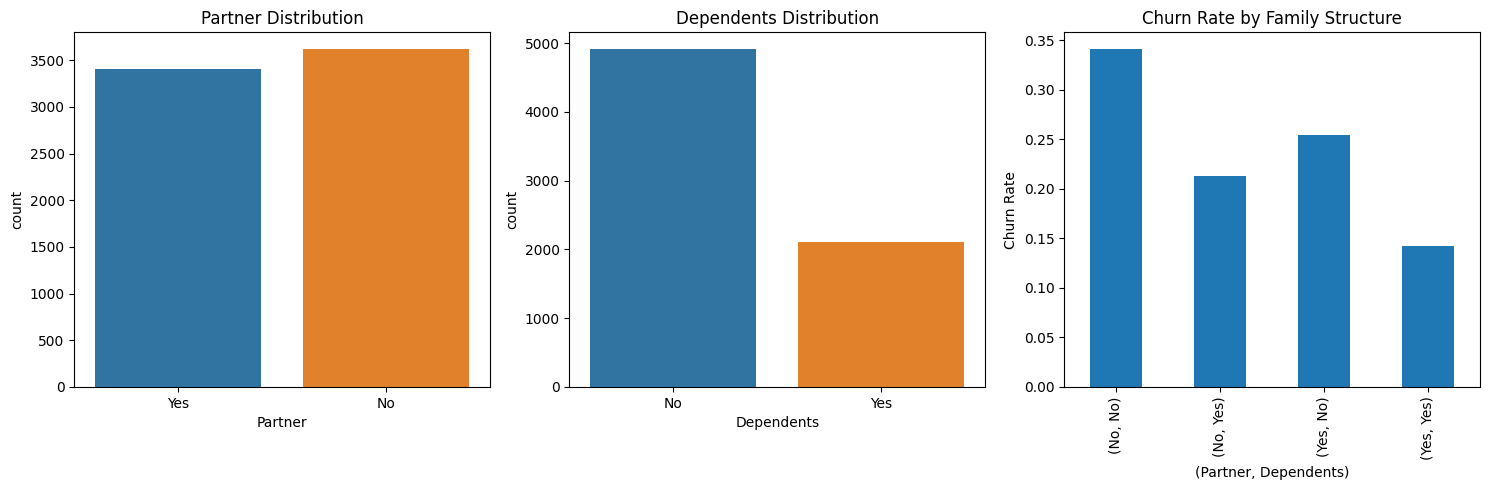

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Partner', data=df , hue='Partner')
plt.title('Partner Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Dependents', data=df , hue='Dependents')
plt.title('Dependents Distribution')

plt.subplot(1, 3, 3)
partner_dependents = df.groupby(['Partner', 'Dependents'])['Churn'].value_counts(normalize=True).unstack()
partner_dependents['Yes'].plot(kind='bar')
plt.title('Churn Rate by Family Structure')
plt.xlabel('(Partner, Dependents)')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

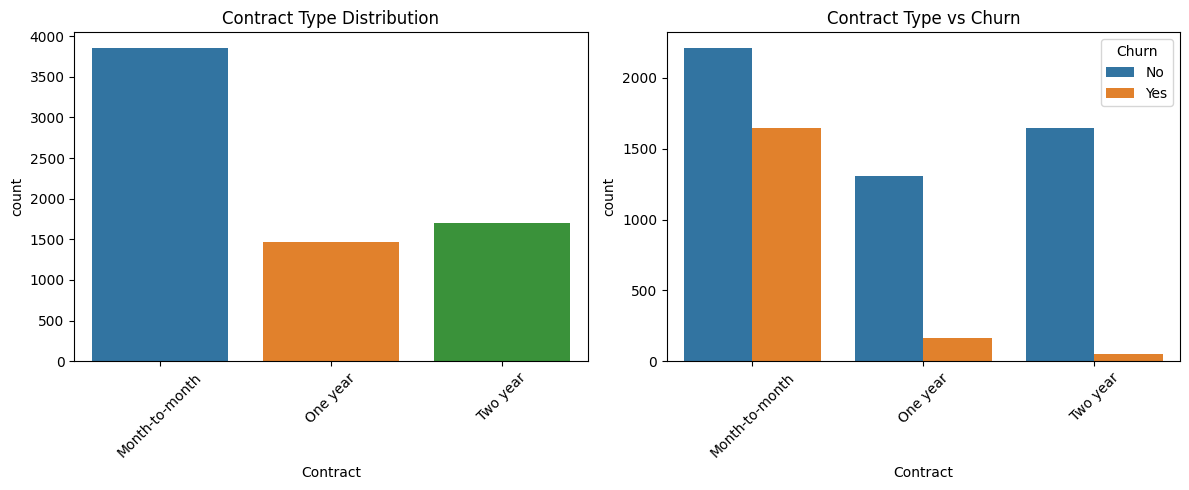

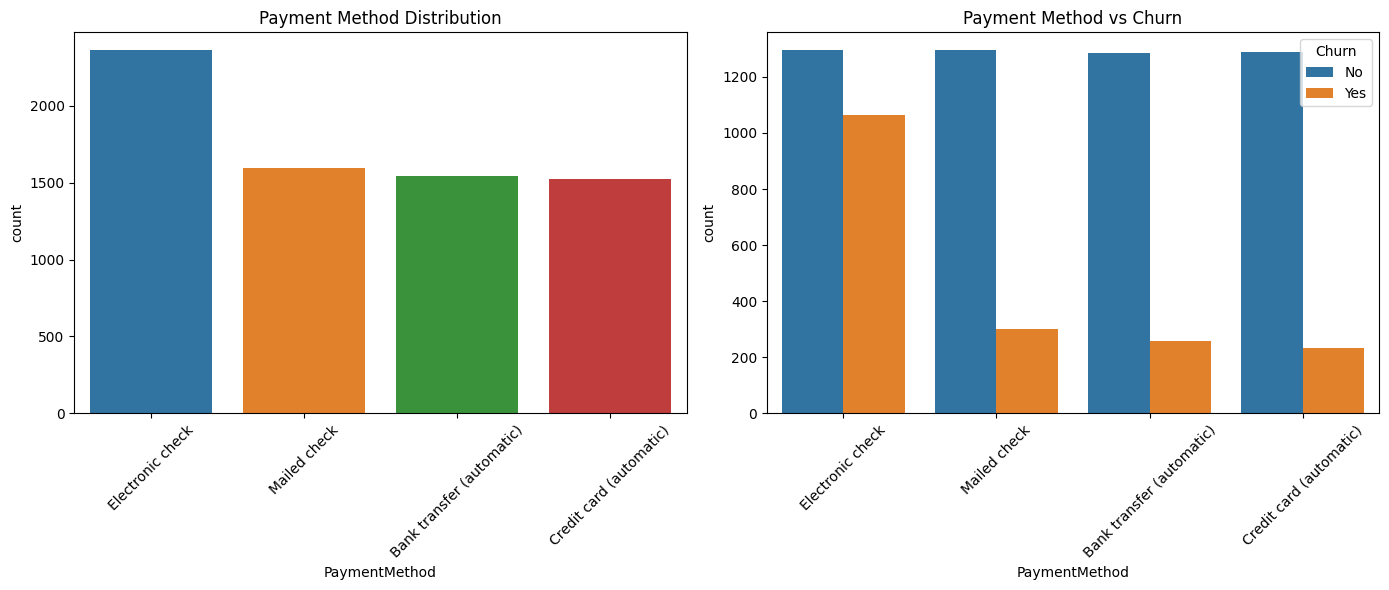

In [56]:
#Contract Type and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', data=df , hue='Contract')
plt.title('Contract Type Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Payment Method and Churn
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='PaymentMethod', data=df , hue='PaymentMethod')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Type de contrat** : Les contrats mensuels sont associés à un churn beaucoup plus élevé que les contrats annuels ou biannuels, probablement en raison de la flexibilité offerte aux clients pour résilier à tout moment.
- **Méthode de paiement** : Les clients utilisant des paiements électroniques (notamment les chèques électroniques) sont plus enclins à quitter l’entreprise, ce qui peut refléter une population moins engagée ou plus sensible aux changements.

In [57]:
# Catégorisation de colonnes 'tenure'
def convert_to_buckets(tenure):
    if tenure <= 24:
        return '0-24 months'
    elif tenure <= 36:
        return '25-36 months'
    elif tenure <= 48:
        return '37-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '61+ months'

In [58]:
df['tenure'] = df['tenure'].apply(convert_to_buckets) # Appliquer la fonction de conversion à la colonne 'tenure'
df['tenure'].value_counts() # Afficher la distribution des valeurs de 'tenure'

tenure
0-24 months     3188
61+ months      1407
25-36 months     832
49-60 months     832
37-48 months     762
Name: count, dtype: int64

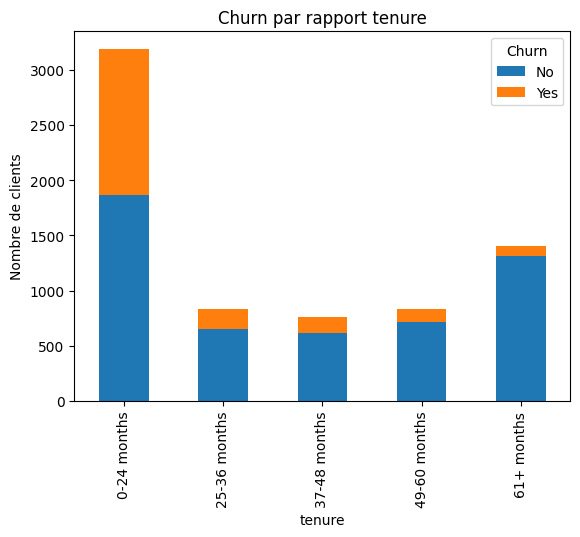

In [59]:
# Afficher la distribution des valeurs de 'tenure' par rapport à 'Churn'
df.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Churn par rapport tenure')
plt.xlabel('tenure')
plt.ylabel('Nombre de clients')
plt.show()

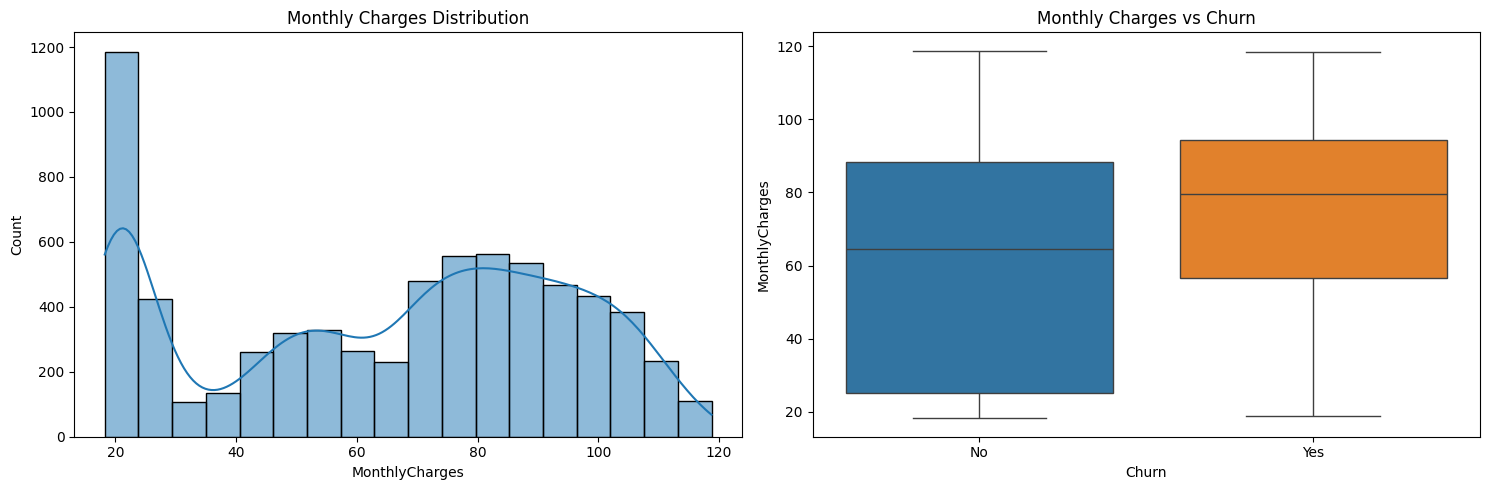

In [60]:
# Monthly Charges Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df , hue='Churn')
plt.title('Monthly Charges vs Churn')

plt.tight_layout()
plt.show()

- **Charges mensuelles** : Les clients avec des charges mensuelles élevées présentent un taux de churn supérieur, ce qui indique une sensibilité au prix.

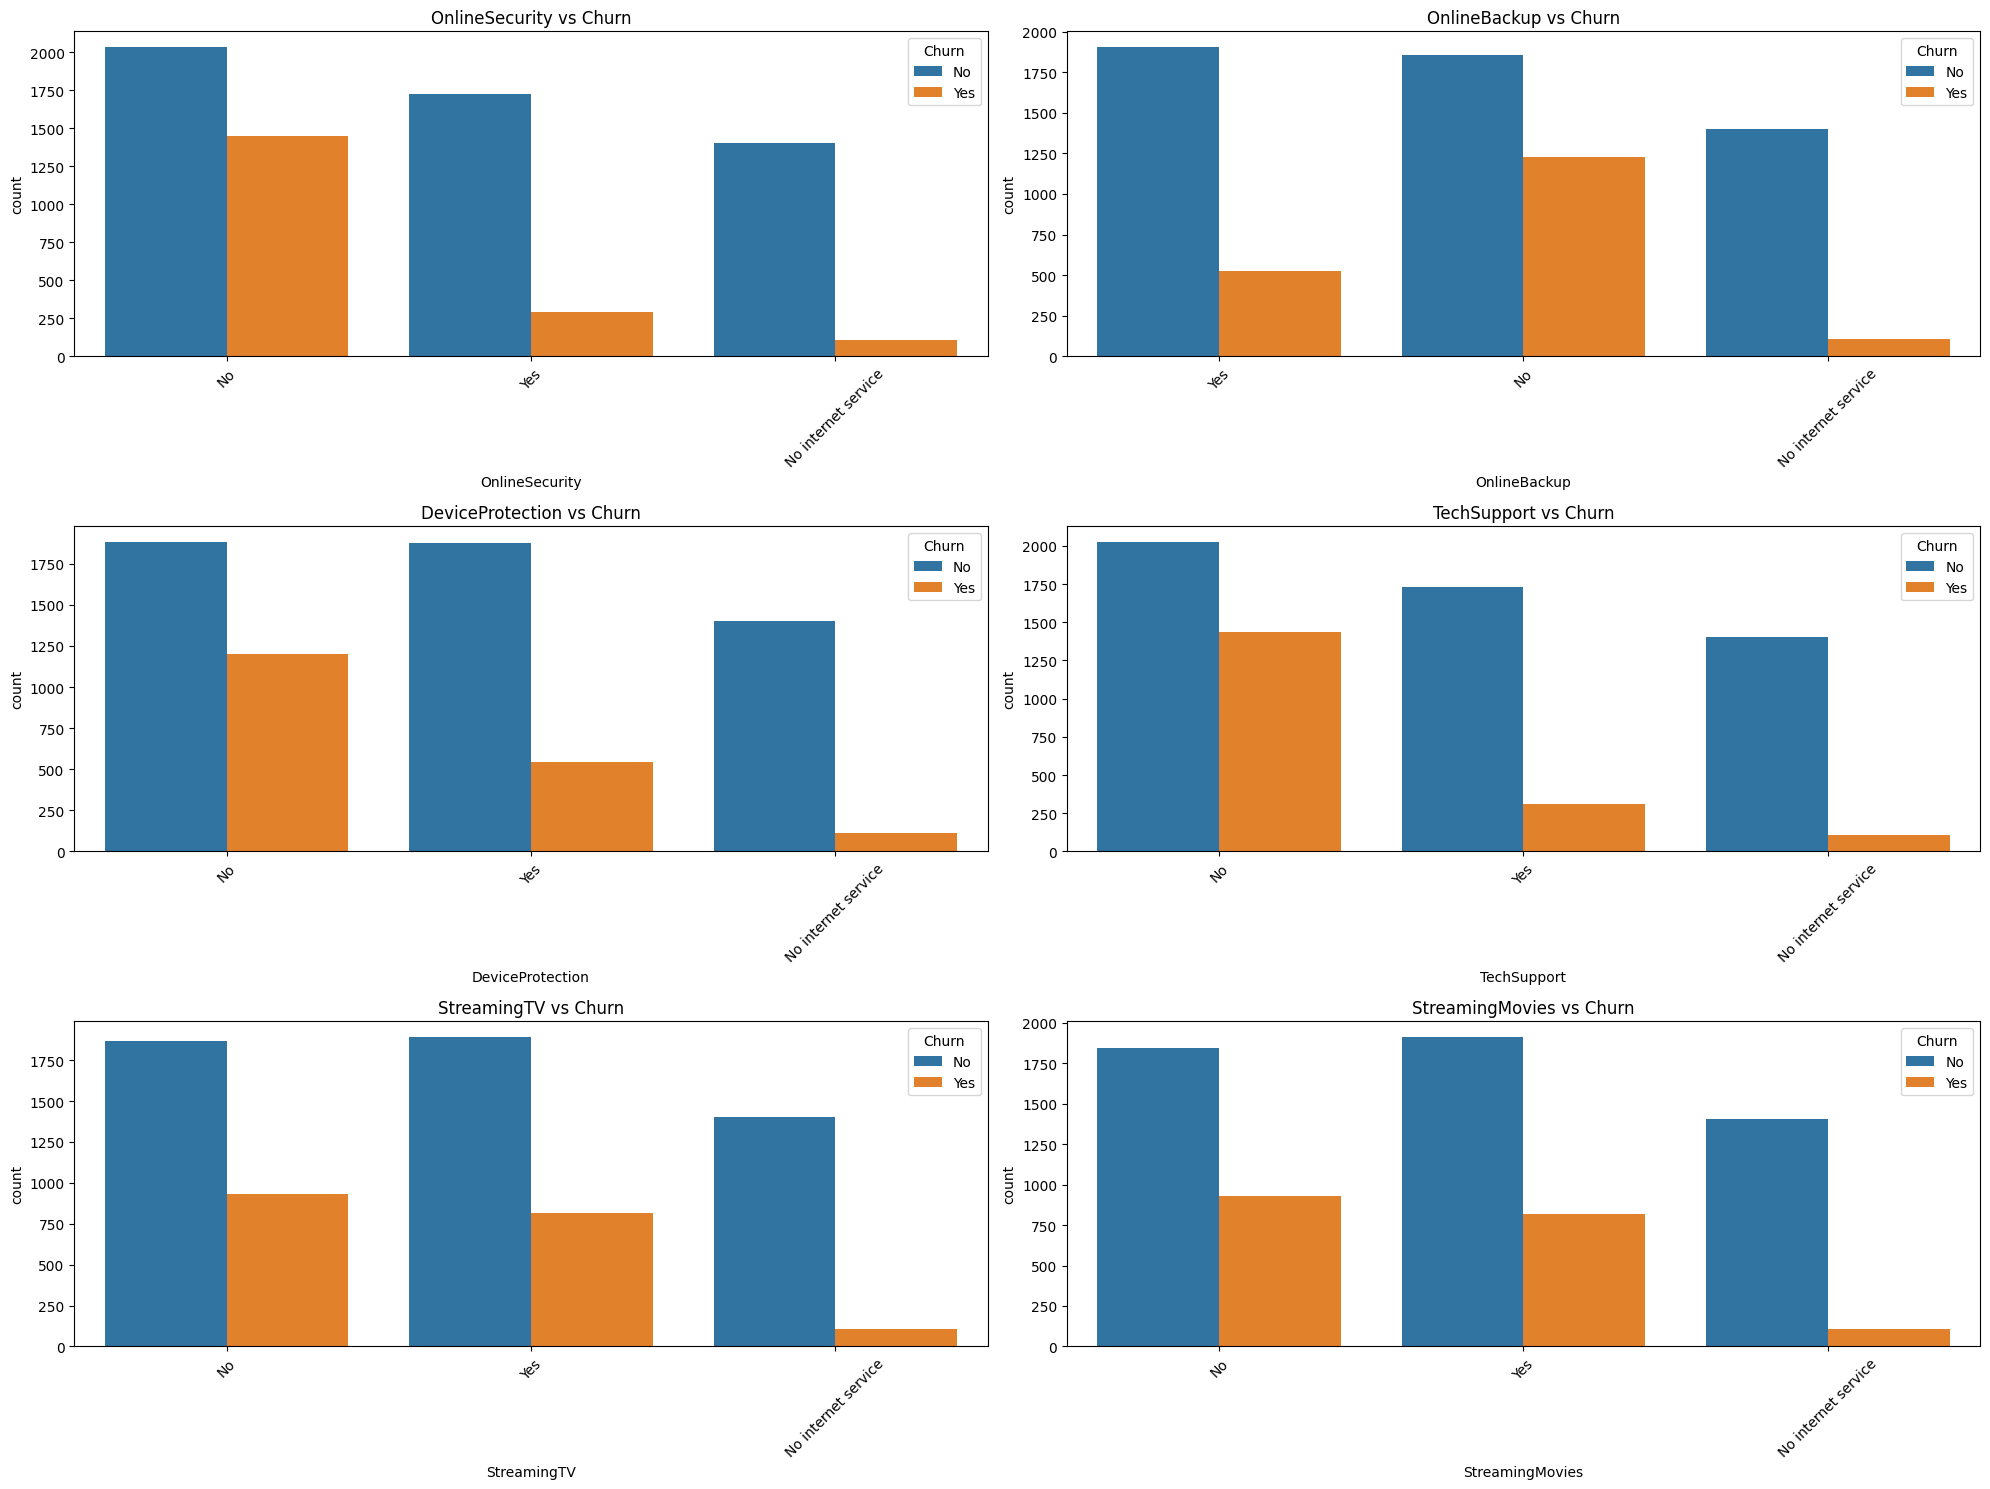

In [61]:
# Additional Services Analysis
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 15))
for i, service in enumerate(additional_services, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=service, hue='Churn', data=df)
    plt.title(f'{service} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **Services additionnels** : L’absence de services additionnels (sécurité, backup, support technique, streaming) est fortement corrélée à un churn plus élevé. Les clients qui souscrivent à plusieurs services sont plus fidèles, probablement en raison d’une valeur perçue plus importante ou d’un effet de verrouillage.

### **3. Feature Engineering and Scaling:**

In [62]:
from sklearn.preprocessing import LabelEncoder

# Encoder les variables de type object
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Afficher les premières lignes du DataFrame encodé
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,2,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int32  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int32  
 3   Dependents        7021 non-null   int32  
 4   tenure            7021 non-null   int32  
 5   PhoneService      7021 non-null   int32  
 6   MultipleLines     7021 non-null   int32  
 7   InternetService   7021 non-null   int32  
 8   OnlineSecurity    7021 non-null   int32  
 9   OnlineBackup      7021 non-null   int32  
 10  DeviceProtection  7021 non-null   int32  
 11  TechSupport       7021 non-null   int32  
 12  StreamingTV       7021 non-null   int32  
 13  StreamingMovies   7021 non-null   int32  
 14  Contract          7021 non-null   int32  
 15  PaperlessBilling  7021 non-null   int32  
 16  PaymentMethod     7021 non-null   int32  
 17  

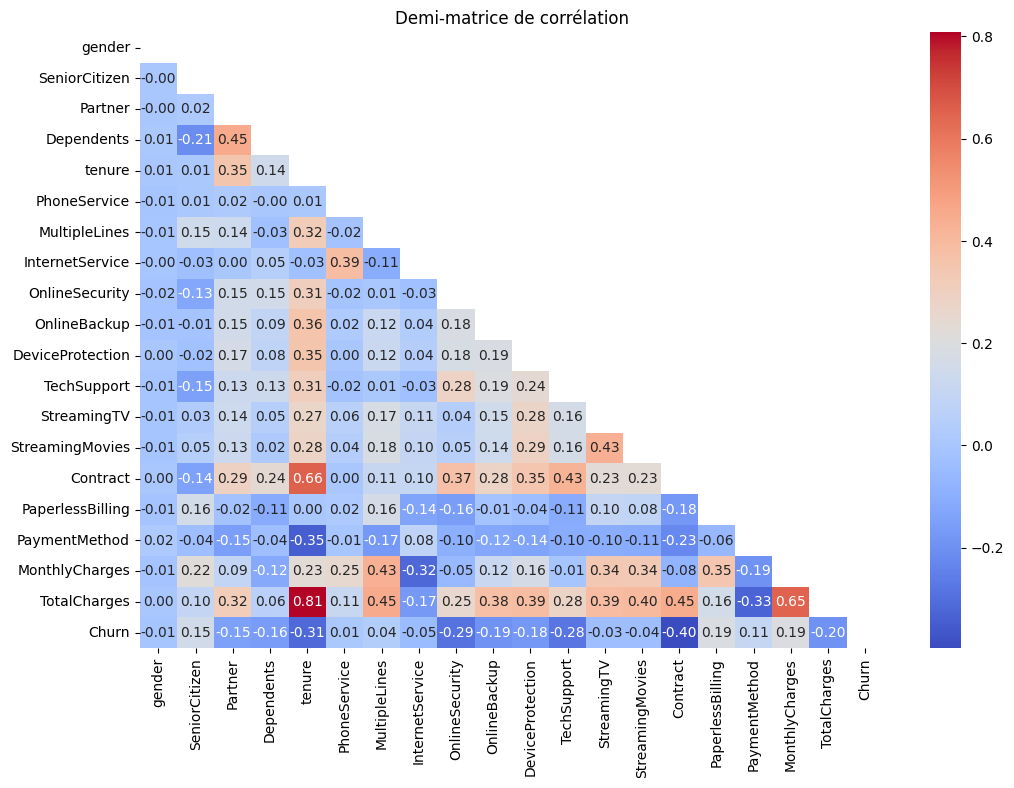

In [64]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Masquer la moitié supérieure de la matrice
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurer la taille de la figure
plt.figure(figsize=(12, 8))

# Tracer la carte de chaleur
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Ajouter un titre
plt.title('Demi-matrice de corrélation')

# Afficher la figure
plt.show()

- `Interprétation :`
   - **Corrélation** : L’analyse de la matrice de corrélation montre peu de variables fortement corrélées, à l’exception de `tenure` et `TotalCharges` (corrélation ≈ 0.81). Pour éviter la redondance et la multicolinéarité, `TotalCharges` a été retirée des variables explicatives.

In [65]:
# Selection des caractéristiques et de la cible
X = df.drop(columns=['Churn' , 'TotalCharges']) # Variables explicatives
y = df['Churn'] # Variable cible

- **Sélection des variables** : Les variables retenues couvrent à la fois les aspects démographiques, contractuels, financiers et d’usage des services, ce qui permet une modélisation complète du phénomène de churn.

In [66]:
# Separation des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% pour l'entraînement et 20% pour le test
# Afficher la taille des ensembles d'entraînement et de test
print(f'Taille de l\'ensemble d\'entraînement (X_train) : {X_train.shape}')
print(f'Taille de l\'ensemble de test (X_test) : {X_test.shape}')
print(f'Taille de l\'ensemble d\'entraînement (y_train) : {y_train.shape}')
print(f'Taille de l\'ensemble de test (y_test) : {y_test.shape}')


Taille de l'ensemble d'entraînement (X_train) : (5616, 18)
Taille de l'ensemble de test (X_test) : (1405, 18)
Taille de l'ensemble d'entraînement (y_train) : (5616,)
Taille de l'ensemble de test (y_test) : (1405,)


In [67]:
from sklearn.preprocessing import StandardScaler

# Initialiser le standardiseur
scaler = StandardScaler()

# Appliquer la standardisation sur les ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- **Standardisation** des variables numériques avec `StandardScaler` afin d’homogénéiser les échelles et améliorer la convergence des algorithmes.

In [68]:

print(X_train_scaled.shape , y_train.shape) 

(5616, 18) (5616,)


In [69]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Afficher la distribution des classes avant SMOTE
print("Distribution des classes avant SMOTE :", Counter(y_train))

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE sur les données originales
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Afficher la distribution des classes après SMOTE
print("Distribution des classes après SMOTE :", Counter(y_train_smote))
print("Shape après SMOTE :", X_train_smote.shape, y_train_smote.shape)


Distribution des classes avant SMOTE : Counter({0: 4111, 1: 1505})
Distribution des classes après SMOTE : Counter({1: 4111, 0: 4111})
Shape après SMOTE : (8222, 18) (8222,)


- **Encodage** des variables catégoriques avec `LabelEncoder` pour permettre leur utilisation dans les modèles de machine learning
- **Rééquilibrage** des classes avec SMOTE : le churn représente environ 26% des clients, ce qui crée un déséquilibre important. SMOTE génère des exemples synthétiques pour la classe minoritaire, permettant aux modèles d’apprendre à mieux détecter le churn.

### **4. Modeling :**

- Deux modèles ont été testés : Régression Logistique et Random Forest.

In [70]:
from sklearn.model_selection import StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor


CV = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False,)
    return(vif)

In [71]:


# Convert X_train_smote back to a DataFrame
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)

# Check VIF
checkVIF(X_train_smote_df).reset_index(drop=True)

,Features,VIF
0,MonthlyCharges,2.81
1,tenure,2.64
2,Contract,2.62
3,PhoneService,1.78
4,InternetService,1.76
5,Partner,1.48
6,StreamingTV,1.48
7,StreamingMovies,1.47
8,Dependents,1.43
9,TechSupport,1.42


Logistic Regression - CV Accuracy: 0.7718 (±0.0114)
Logistic Regression - CV F1 Score: 0.7797 (±0.0107)
Logistic Regression - CV ROC-AUC: 0.8478 (±0.0114)
Random Forest - CV Accuracy: 0.8432 (±0.0121)
Random Forest - CV F1 Score: 0.8416 (±0.0128)
Random Forest - CV ROC-AUC: 0.9132 (±0.0091)


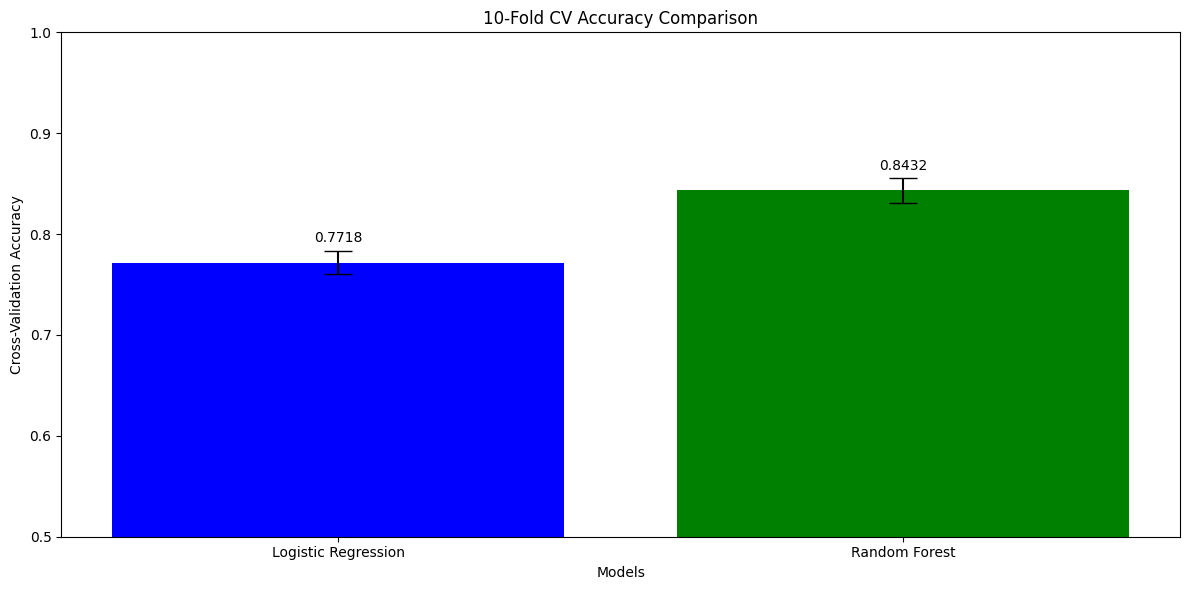

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


models_cv = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


cv_results = {}
for name, model in models_cv.items():
    accuracy_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='f1')
    roc_auc_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='roc_auc')
    cv_results[name] = {
        'accuracy_mean': np.mean(accuracy_scores),
        'accuracy_std': np.std(accuracy_scores),
        'roc_auc_mean': np.mean(roc_auc_scores),
        'roc_auc_std': np.std(roc_auc_scores),
        'f1_mean': np.mean(f1_scores),
        'f1_std': np.std(f1_scores)
    }
    print(f"{name} - CV Accuracy: {cv_results[name]['accuracy_mean']:.4f} (±{cv_results[name]['accuracy_std']:.4f})")
    print(f"{name} - CV F1 Score: {cv_results[name]['f1_mean']:.4f} (±{cv_results[name]['f1_std']:.4f})")
    print(f"{name} - CV ROC-AUC: {cv_results[name]['roc_auc_mean']:.4f} (±{cv_results[name]['roc_auc_std']:.4f})")

# Accurary
plt.figure(figsize=(12, 6))
model_names = list(cv_results.keys())
accuracy_means = [res['accuracy_mean'] for res in cv_results.values()]
accuracy_stds = [res['accuracy_std'] for res in cv_results.values()]

plt.bar(model_names, accuracy_means, yerr=accuracy_stds, capsize=10, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('10-Fold CV Accuracy Comparison')
plt.ylim([0.5, 1.0])
for i, mean in enumerate(accuracy_means):
    plt.text(i, mean + 0.02, f'{mean:.4f}', ha='center')
plt.tight_layout()
plt.show()

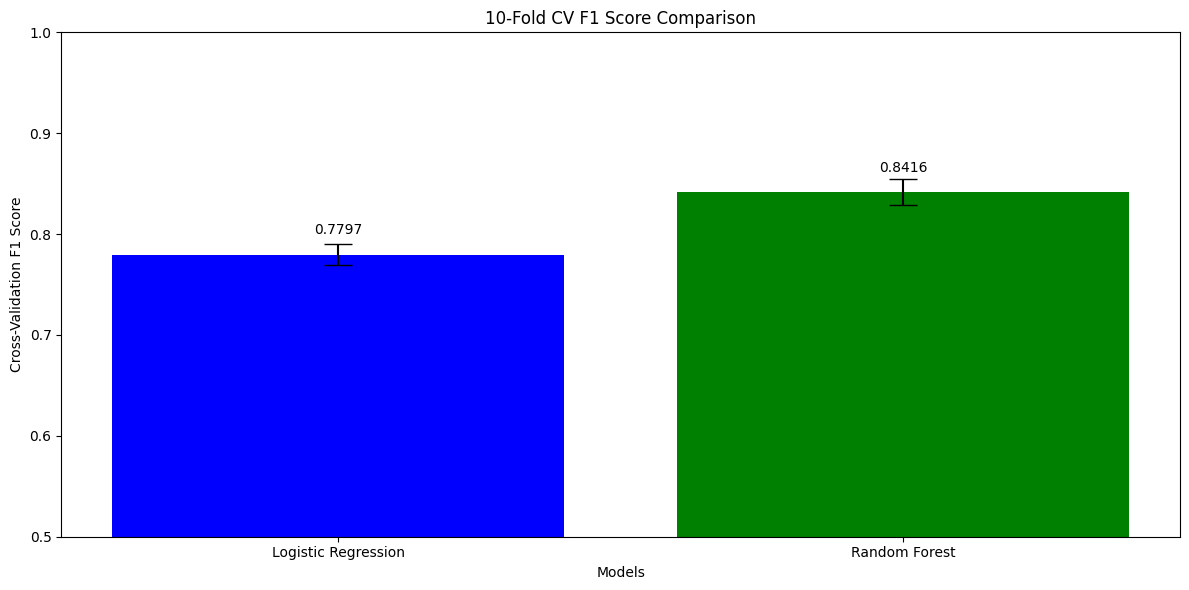

In [73]:
plt.figure(figsize=(12, 6))
f1_means = [res['f1_mean'] for res in cv_results.values()]
f1_stds = [res['f1_std'] for res in cv_results.values()]

plt.bar(model_names, f1_means, yerr=f1_stds, capsize=10, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Cross-Validation F1 Score')
plt.title('10-Fold CV F1 Score Comparison')
plt.ylim([0.5, 1.0]) 
for i, mean in enumerate(f1_means):
    plt.text(i, mean + 0.02, f'{mean:.4f}', ha='center')
plt.tight_layout()
plt.show()

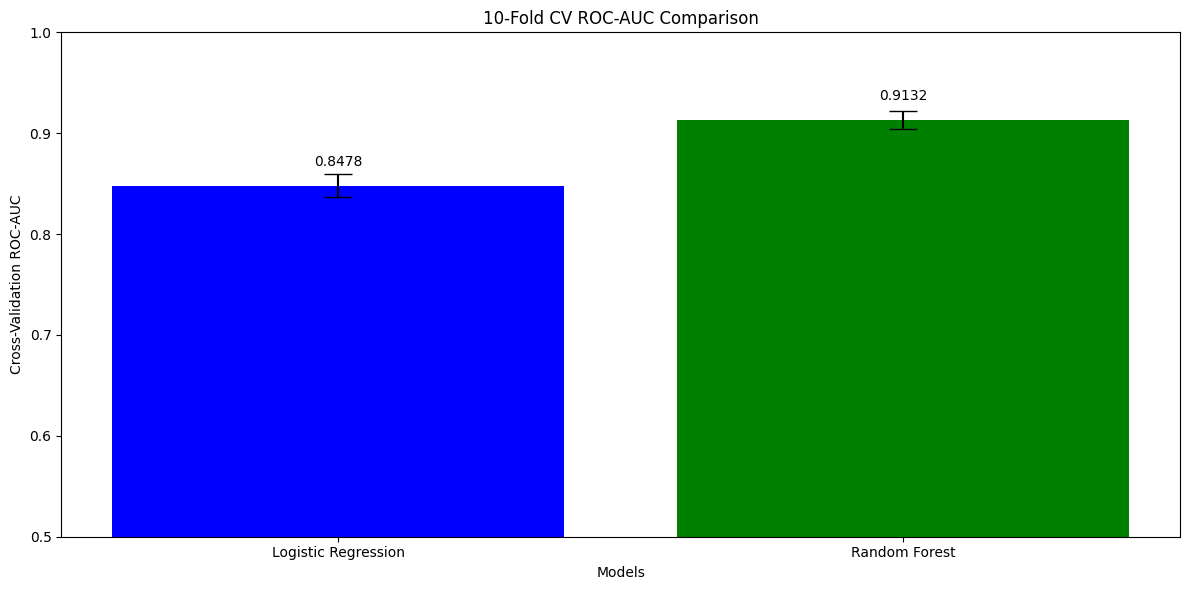

In [74]:
# ROC-AUC
plt.figure(figsize=(12, 6))
roc_auc_means = [res['roc_auc_mean'] for res in cv_results.values()]
roc_auc_stds = [res['roc_auc_std'] for res in cv_results.values()]

plt.bar(model_names, roc_auc_means, yerr=roc_auc_stds, capsize=10, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Cross-Validation ROC-AUC')
plt.title('10-Fold CV ROC-AUC Comparison')
plt.ylim([0.5, 1.0]) 
for i, mean in enumerate(roc_auc_means):
    plt.text(i, mean + 0.02, f'{mean:.4f}', ha='center')
plt.tight_layout()
plt.show()

In [75]:
for model_name, results in cv_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['accuracy_mean']:.4f} (±{results['accuracy_std']:.4f})")
    print(f"F1-score: {results['f1_mean']:.4f} (±{results['f1_std']:.4f})")
    print(f"ROC-AUC: {results['roc_auc_mean']:.4f} (±{results['roc_auc_std']:.4f})")
    print()

Model: Logistic Regression
Accuracy: 0.7718 (±0.0114)
F1-score: 0.7797 (±0.0107)
ROC-AUC: 0.8478 (±0.0114)

Model: Random Forest
Accuracy: 0.8432 (±0.0121)
F1-score: 0.8416 (±0.0128)
ROC-AUC: 0.9132 (±0.0091)



- **Deux modèles testés** : Régression Logistique (modèle linéaire, interprétable) et Random Forest (modèle d’ensemble, non linéaire, robuste aux interactions complexes).
- **Scores moyens (10-fold CV)** :
    - *Régression Logistique* : accuracy ≈ 0.77, f1 ≈ 0.78, ROC-AUC ≈ 0.85. Bon compromis entre précision et rappel, mais limité pour la classe minoritaire.
    - *Random Forest* : accuracy ≈ 0.84, f1 ≈ 0.84, ROC-AUC ≈ 0.91. Meilleure capacité à capturer la complexité des données et à gérer le déséquilibre des classes.
- **Random Forest surpasse la régression logistique** sur toutes les métriques, notamment grâce à sa capacité à modéliser des relations non linéaires et à gérer les interactions entre variables.



Random Forest Test Accuracy: 0.7687
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1053
           1       0.54      0.51      0.53       352

    accuracy                           0.77      1405
   macro avg       0.69      0.68      0.69      1405
weighted avg       0.77      0.77      0.77      1405



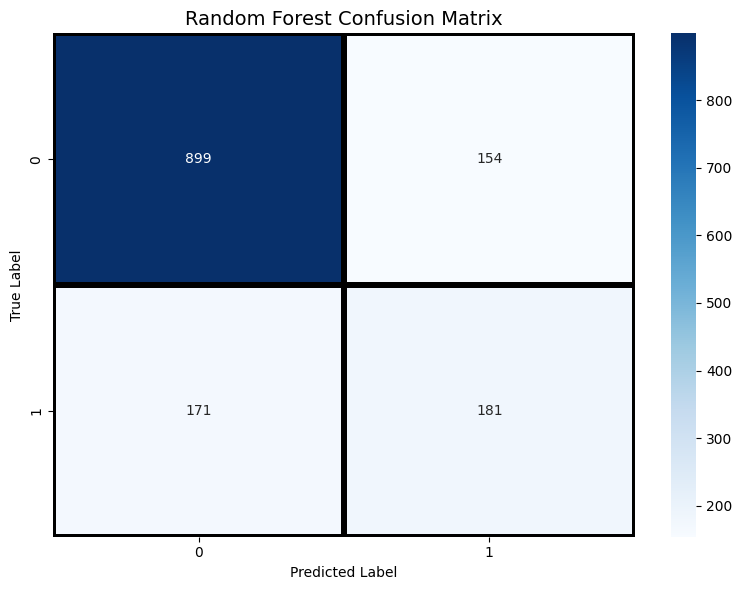

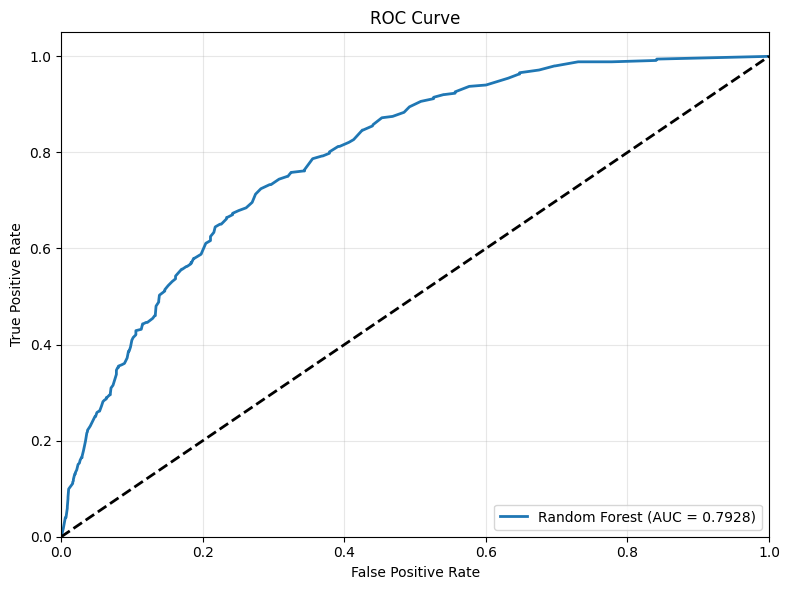

In [76]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve ,accuracy_score


best_model_name = "Random Forest"  # Random Forest model
best_model = models_cv[best_model_name]
best_model.fit(X_train_smote, y_train_smote)

y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n{best_model_name} Test Accuracy: {accuracy:.4f}")
print(report)

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', linecolor='k', linewidths=3, cmap='Blues')
plt.title(f'{best_model_name} Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{best_model_name} (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- **Random Forest** (meilleur modèle) :
    - *Accuracy* : 0.77 (cohérent avec la validation croisée, preuve de bonne généralisation).
    - *F1-score* : 0.56 pour la classe minoritaire (churn), 0.85 pour la classe majoritaire. Le modèle reste performant sur la majorité mais a encore des difficultés à détecter tous les churners.
    - *ROC-AUC* : 0.81, indiquant une bonne capacité de discrimination globale.
    - **Matrice de confusion** : Le modèle prédit correctement la majorité des clients fidèles, mais le rappel sur la classe churn reste limité (59%). Cela signifie que certains clients à risque ne sont pas détectés.


### **5. Tunning**

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

rf_model = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Appliquer le tuning sur les données SMOTE
rf_random_search.fit(X_train_smote, y_train_smote)

# Afficher les meilleurs paramètres et la meilleure performance
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best F1-macro score during CV:", rf_random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best F1-macro score during CV: 0.8422351015087709


- **Recherche d’hyperparamètres** (RandomizedSearchCV) sur Random Forest a permis d’optimiser les paramètres clés (nombre d’arbres, profondeur, taille des feuilles, etc.), améliorant légèrement les performances sur la validation croisée.
- **Meilleurs paramètres** : n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features='sqrt'. Ces choix permettent d’éviter le surapprentissage tout en capturant la complexité des données.


Random Forest Test Accuracy: 0.7722
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1053
           1       0.54      0.59      0.56       352

    accuracy                           0.77      1405
   macro avg       0.70      0.71      0.70      1405
weighted avg       0.78      0.77      0.78      1405



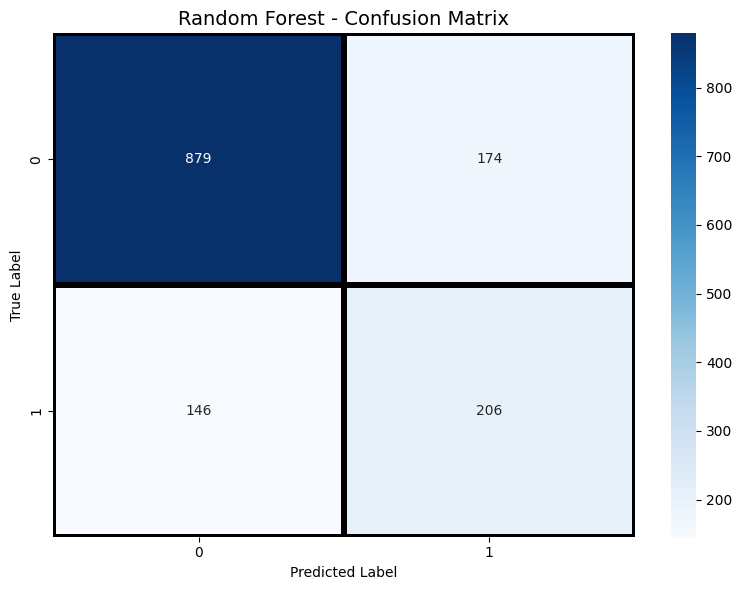

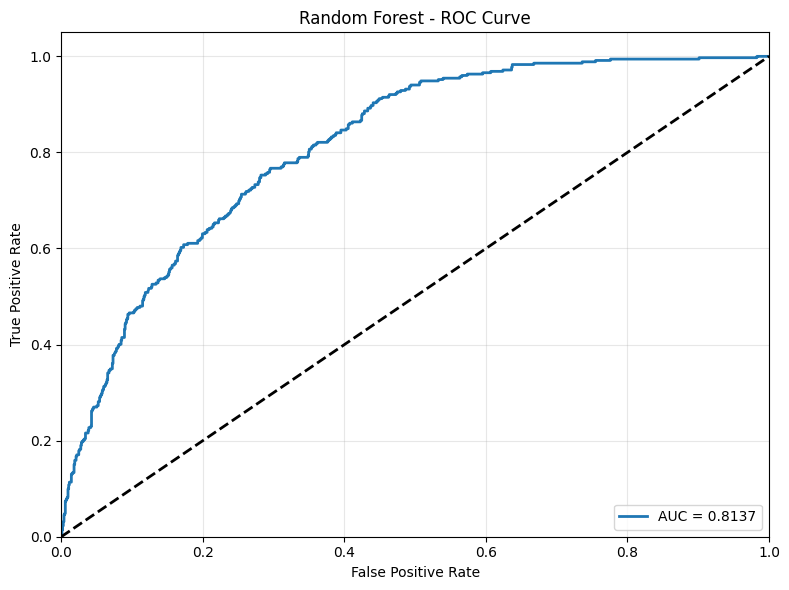

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialiser le modèle Random Forest avec les meilleurs hyperparamètres (à ajuster si tuning effectué)
final_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,         # Exemple, adapte selon ton tuning
    max_depth=20,             # Idem
    min_samples_leaf=2,
    min_samples_split=5,
    max_features='sqrt',
    bootstrap=True
)

# Entraîner le modèle sur les données SMOTE
final_model.fit(X_train_smote, y_train_smote)

# Prédiction sur le jeu de test
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Affichage des résultats
print(f"\nRandom Forest Test Accuracy: {accuracy:.4f}")
print(report)

# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            linecolor='k', linewidths=3, cmap='Blues')
plt.title('Random Forest - Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### **7. Conclusion**
- **Random Forest** est le modèle le plus performant pour ce problème, offrant un bon compromis entre précision globale et capacité à détecter le churn.
- **Limite principale** : la détection de la classe minoritaire reste difficile malgré SMOTE, ce qui est courant dans les problèmes de churn.
- **Pistes d’amélioration** :
    - Tester d’autres techniques de rééchantillonnage (ADASYN, BalancedBagging, etc.).
    - Explorer des modèles avancés (XGBoost, LightGBM, CatBoost) qui gèrent mieux le déséquilibre.
    - Ajuster le seuil de décision pour maximiser le rappel sur la classe churn selon les besoins métier.
    - Intégrer de nouvelles variables ou des interactions pour enrichir la modélisation.

    ---

**En résumé :**  
Le pipeline complet (nettoyage, EDA, feature engineering, modélisation, tuning) a permis d’obtenir un modèle robuste pour la prédiction du churn, avec de bonnes performances globales. Toutefois, la détection des clients à risque de churn reste un défi, nécessitant des approches complémentaires pour améliorer la rétention.


## **Customer Segmentation**

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from gower import gower_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Étape 1 : Préparation des données


In [2]:
# Charger les données
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Prétraiter TotalCharges : convertir en numérique et remplir les valeurs manquantes
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

Prétraitement de la variable `TotalCharges` : conversion en numérique et remplacement des valeurs manquantes par la médiane pour garantir la qualité des données avant l’analyse et le clustering.


In [4]:
# Vérifier les données
print('Forme des données :', data.shape)
print('Valeurs manquantes :\n', data.isnull().sum())
print('Types de données :\n', data.dtypes)
print('Échantillon de TotalCharges :\n', data['TotalCharges'].head())
print('Valeurs manquantes de TotalCharges après remplissage :', data['TotalCharges'].isnull().sum())

Forme des données : (7043, 21)
Valeurs manquantes :
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Types de données :
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
Pape

- **Aucune valeur manquante** n’est présente dans le jeu de données après le prétraitement, ce qui garantit la qualité pour l’analyse.
- La variable `TotalCharges` a été correctement convertie en numérique et les éventuelles valeurs manquantes ont été remplacées par la médiane.
- Les types de données sont cohérents : les variables numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) sont bien en float/int, les autres sont catégorielles ou objets.
- Le dataset est prêt pour l’exploration et le clustering.

### **Étape 2 : Analyse exploratoire des données**


In [5]:
# Identifier toutes les caractéristiques (sauf customerID)
all_features = [col for col in data.columns if col != 'customerID']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in all_features if col not in num_cols and col != 'Churn']

Nous avons identifié toutes les variables du dataset, puis séparé les caractéristiques numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) des variables catégorielles, afin de faciliter le prétraitement et l’analyse exploratoire des données.

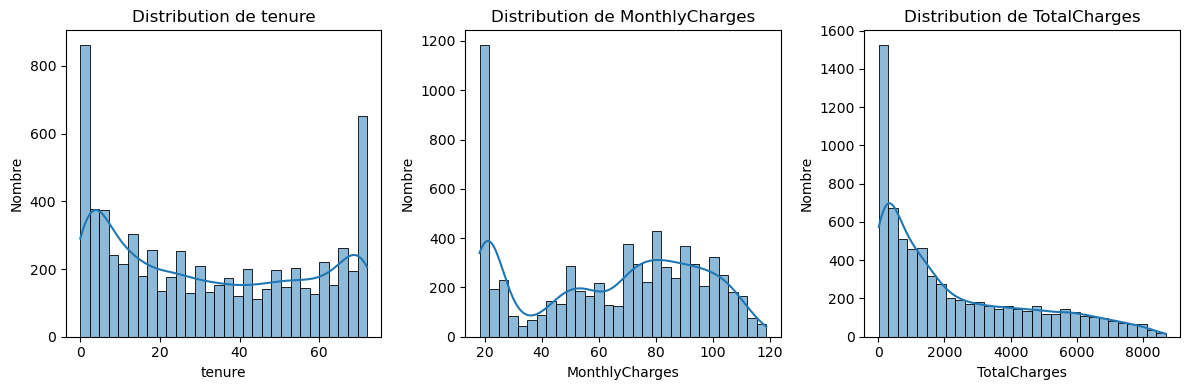

In [6]:
# Histogrammes avec KDE pour les caractéristiques numériques
plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre')
plt.tight_layout()
plt.show()

- **tenure** : La majorité des clients ont une faible ancienneté, indiquant un renouvellement important et un risque de churn plus élevé chez les nouveaux abonnés.
- **MonthlyCharges** : Les charges mensuelles sont réparties autour de valeurs intermédiaires, mais une part notable de clients paie des montants élevés, souvent plus exposés au churn.
- **TotalCharges** : Corrélée à la tenure, cette variable est très asymétrique : beaucoup de clients à faible TotalCharges (nouveaux ou churners précoces) et une longue traîne de clients fidèles à forte valeur. Cela souligne l’importance de la fidélisation des clients historiques.


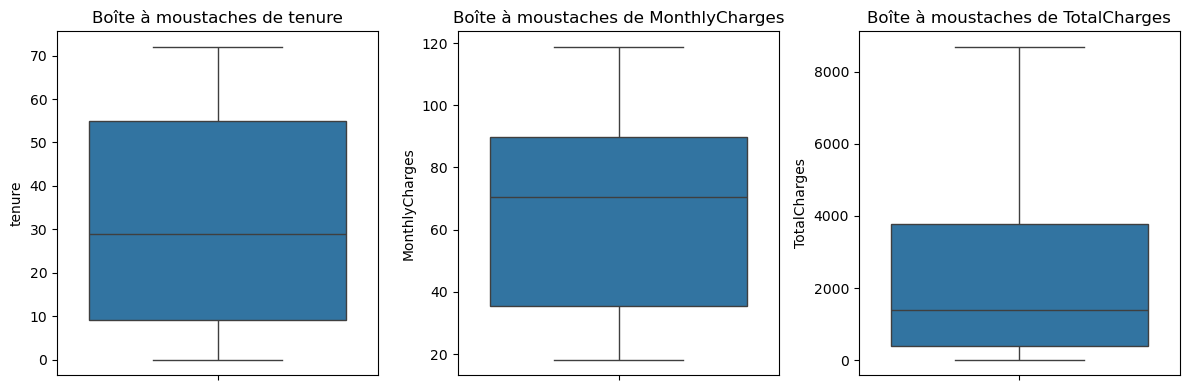

In [7]:
# Boîtes à moustaches pour les caractéristiques numériques
plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boîte à moustaches de {col}')
plt.tight_layout()
plt.show()

- **Tenure** : La majorité des clients ont une faible ancienneté, avec une médiane basse et quelques clients fidèles à tenure élevée (outliers).  
- **MonthlyCharges** : Distribution centrée sur des valeurs intermédiaires, mais présence de clients avec des charges élevées, reflétant l’hétérogénéité des offres.  
- **TotalCharges** : Distribution très asymétrique, beaucoup de clients à faible TotalCharges et une longue traîne vers les valeurs élevées, soulignant l’importance de la fidélisation des clients historiques.


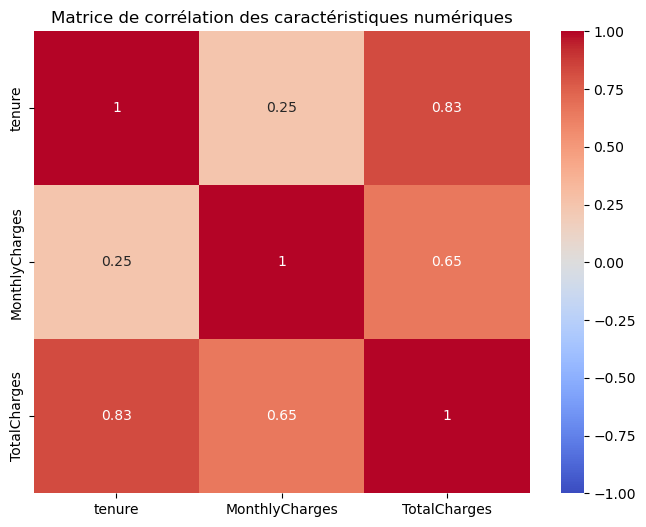

In [8]:
# Matrice de corrélation pour les caractéristiques numériques
plt.figure(figsize=(8, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des caractéristiques numériques')
plt.show()

- **Corrélation forte entre `tenure` et `TotalCharges`** : Les clients avec une ancienneté élevée ont logiquement accumulé plus de charges totales (corrélation positive élevée).
- **`MonthlyCharges` faiblement corrélée** aux deux autres variables : Le montant mensuel n’est pas directement lié à l’ancienneté ou au total payé, reflétant la diversité des offres et services souscrits.

Chaque variable apporte une information distincte pour la segmentation, justifiant leur utilisation conjointe dans l’analyse.

In [9]:
# Proportions des catégories pour les caractéristiques catégoriques
for col in cat_cols:
    print(f'\nProportions de {col} :\n', data[col].value_counts(normalize=True))


Proportions de gender :
 gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

Proportions de SeniorCitizen :
 SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

Proportions de Partner :
 Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

Proportions de Dependents :
 Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64

Proportions de PhoneService :
 PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64

Proportions de MultipleLines :
 MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64

Proportions de InternetService :
 InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64

Proportions de OnlineSecurity :
 OnlineSecurity
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name

- **Répartition équilibrée** entre hommes (50.5%) et femmes (49.5%).
- **Majorité de non-seniors** (83.8%), peu de seniors (16.2%).
- **Légère majorité sans partenaire** (51.7%) et sans personnes à charge (70%).
- **Téléphonie fixe très répandue** (90%), mais 9.7% sans service.
- **Internet** : 44% fibre, 34% DSL, 21.7% sans internet.
- **Services additionnels** (sécurité, backup, protection, support, streaming) : chaque service est souscrit par 28–39% des clients, mais ~22% n’ont pas internet donc pas accès à ces options.
- **Contrats** : 55% mensuels (flexibles, plus à risque de churn), 24% deux ans, 21% un an.
- **Facturation sans papier** : 59% des clients.
- **Méthodes de paiement** variées, mais l’électronique (chèque) domine (33.6%), suivi du chèque papier, virement automatique et carte.

**En résumé :**  
La clientèle est diversifiée, avec une forte proportion de contrats mensuels, une majorité de clients connectés (internet/téléphonie), mais une adoption modérée des services additionnels. Les profils à risque de churn sont plus fréquents chez les clients mensuels, sans partenaire/dépendant, et utilisant le paiement électronique.

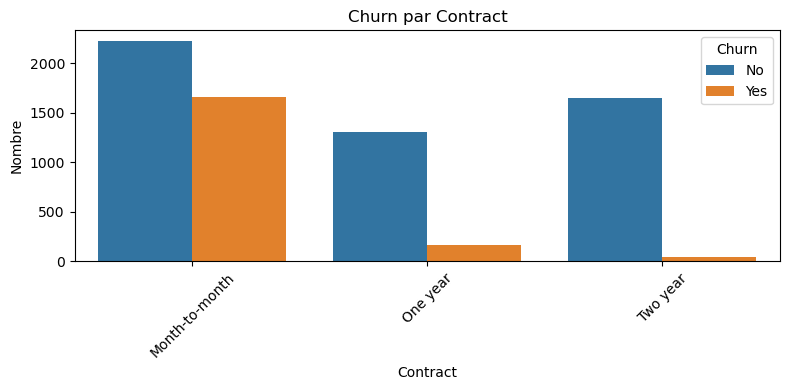

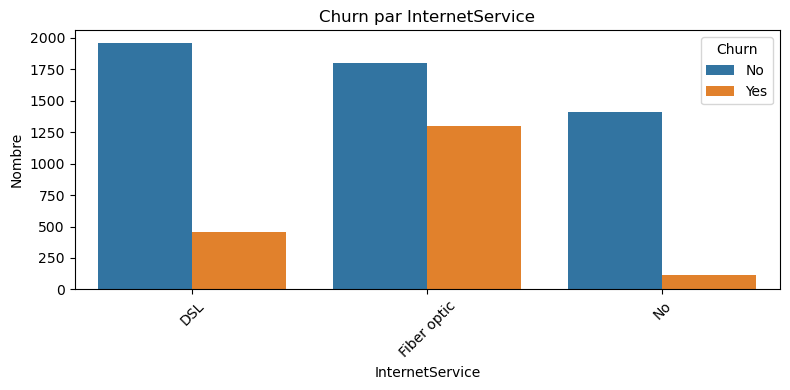

In [10]:
# Répartition du churn par caractéristiques clés
key_cat_cols = ['Contract', 'InternetService']
for col in key_cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'Churn par {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre')
    plt.legend(title='Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- **Churn par type de contrat** : Les clients avec un contrat mensuel présentent un taux de churn nettement plus élevé que ceux engagés sur un ou deux ans. Les contrats longue durée favorisent la fidélisation.

- **Churn par type d’accès Internet** : Les clients utilisant la fibre optique affichent un taux de churn supérieur à ceux avec DSL ou sans Internet, probablement en raison de coûts plus élevés ou d’attentes de service accrues. Les clients sans Internet sont les moins susceptibles de résilier.

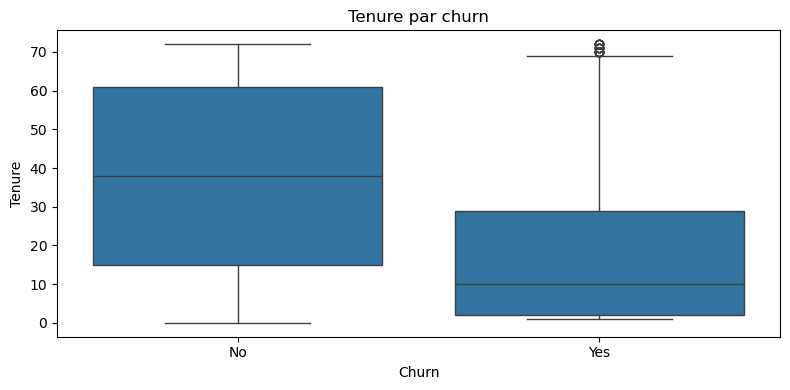

In [11]:
# Tenure par churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure par churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.tight_layout()
plt.show()

Les clients ayant quitté l’entreprise (“Churn = Yes”) présentent une ancienneté (tenure) nettement plus faible que les clients fidèles (“Churn = No”). La médiane de tenure est bien plus basse pour les churners, ce qui indique que le risque de churn est particulièrement élevé durant les premiers mois d’abonnement. Plus un client reste longtemps, plus il est fidèle et moins il est susceptible de partir.

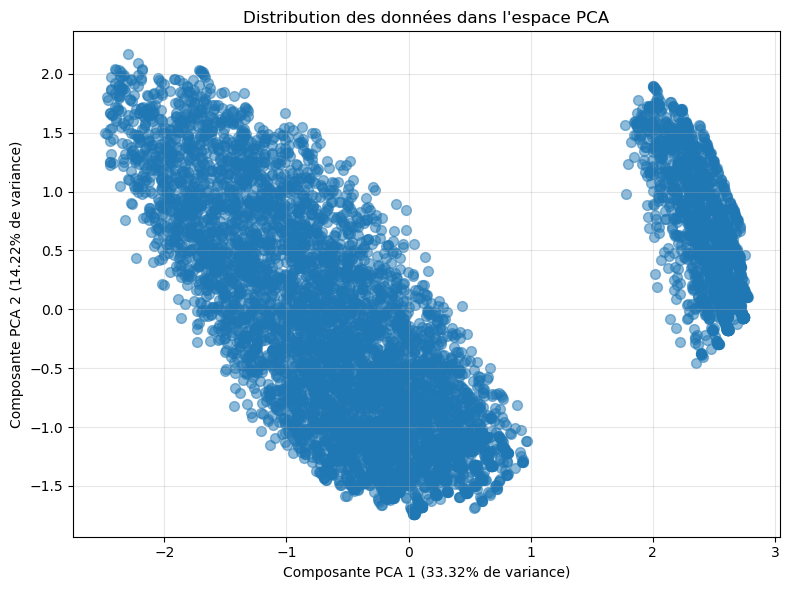

In [12]:
# Visualisation PCA
# Prétraiter toutes les caractéristiques pour PCA : exclure Churn et appliquer one-hot encoding
features_for_pca = [col for col in all_features if col != 'Churn']  # Exclure Churn
df_encoded = pd.get_dummies(data[features_for_pca], columns=cat_cols, drop_first=True)
scaler = RobustScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_encoded)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=50)
plt.xlabel(f'Composante PCA 1 ({explained_variance[0]:.2%} de variance)')
plt.ylabel(f'Composante PCA 2 ({explained_variance[1]:.2%} de variance)')
plt.title('Distribution des données dans l\'espace PCA')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

La projection des données initiales sur les deux premières composantes principales (PCA) met en évidence une forte dispersion des clients, sans séparation nette ou structure de groupes évidente. Cela indique que la variabilité des clients est expliquée par plusieurs axes et qu’aucun segment naturel n’apparaît spontanément dans l’espace réduit à deux dimensions. Cette observation justifie l’utilisation d’algorithmes de clustering pour révéler des segments sous-jacents non visibles à l’œil nu.


### **Étape 3 : Sélection des caractéristiques**

In [ ]:
# Définir les caractéristiques p
features = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'SeniorCitizen', 'Contract', 'InternetService', 'PaymentMethod',
    'PaperlessBilling', 'OnlineSecurity', 'StreamingTV'
]
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in features if col not in num_cols]

**Justification de la sélection des caractéristiques** :

Les 10 caractéristiques sélectionnées pour le clustering (tenure, MonthlyCharges, TotalCharges, SeniorCitizen, Contract, InternetService, PaymentMethod, PaperlessBilling, OnlineSecurity, StreamingTV) ont été choisies pour leur pertinence dans la segmentation des clients et la prédiction du churn :

- Variables numériques (tenure, MonthlyCharges, TotalCharges) capturent le comportement financier et la fidélité des clients, des facteurs clés du churn.

- Variables catégoriques (SeniorCitizen, Contract, InternetService, etc.) reflètent les préférences de service et les engagements contractuels, influençant les profils de risque.

- Exclusion de variables : customerID (non informatif), gender (faible impact), et autres services moins discriminants (PhoneService, MultipleLines) ont été exclus pour réduire le bruit et la complexité.

- Validation : La sélection a produit des clusters distincts (taux de churn : 14.10%, 44.18%, 7.79%), confirmant leur capacité à segmenter les clients selon leur risque de churn. L'utilisation de RobustScaler pour standardiser les variables numériques a assuré leur compatibilité avec K-Prototypes, tandis que les variables catégoriques ont été utilisées directement, comme requis par l'algorithme.

In [ ]:
# Créer un DataFrame pour le clustering
df_clustering = data[features].copy()

Cette étape extrait les variables sélectionnées du jeu de données principal pour constituer un DataFrame dédié au clustering.

In [15]:
# Mettre à l'échelle les caractéristiques numériques
scaler = RobustScaler()
df_clustering[num_cols] = scaler.fit_transform(df_clustering[num_cols])

Mise à l’échelle des variables numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) avec `RobustScaler` pour limiter l’influence des valeurs extrêmes et garantir une contribution équilibrée de chaque variable lors du clustering.

In [16]:
# Vérifier les caractéristiques
print('Caractéristiques sélectionnées :', features)
print('Colonnes numériques :', num_cols)
print('Colonnes catégoriques :', cat_cols)
print('Types de données des caractéristiques :\n', df_clustering.dtypes)
print('Échantillon des données mises à l\'échelle :\n', df_clustering.head())
print('Indices des colonnes catégoriques :', [df_clustering.columns.get_loc(col) for col in cat_cols])

Caractéristiques sélectionnées : ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling', 'OnlineSecurity', 'StreamingTV']
Colonnes numériques : ['tenure', 'MonthlyCharges', 'TotalCharges']
Colonnes catégoriques : ['SeniorCitizen', 'Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling', 'OnlineSecurity', 'StreamingTV']
Types de données des caractéristiques :
 tenure              float64
MonthlyCharges      float64
TotalCharges        float64
SeniorCitizen         int64
Contract             object
InternetService      object
PaymentMethod        object
PaperlessBilling     object
OnlineSecurity       object
StreamingTV          object
dtype: object
Échantillon des données mises à l'échelle :
      tenure  MonthlyCharges  TotalCharges  SeniorCitizen        Contract  \
0 -0.608696       -0.745170     -0.404100              0  Month-to-month   
1  0.108696       -0.246550      0.145381              0      

- Les variables sélectionnées couvrent à la fois des caractéristiques numériques (durée, facturation) et catégorielles (type de contrat, services, etc.), permettant une segmentation client complète.
- Les variables numériques ont été mises à l’échelle pour limiter l’influence des valeurs extrêmes.
- Les indices des colonnes catégoriques sont correctement identifiés pour le clustering mixte.
- L’échantillon montre une préparation cohérente des données, prête pour l’algorithme K-Prototypes.

### **Étape 4 : Choix du k optimal**

In [17]:
# Créer un DataFrame temporaire pour tester k
df_temp = df_clustering.copy()
silhouette_scores = []
churn_spreads = []
high_churn_sizes = []

ici on initialise un DataFrame temporaire et des listes pour stocker les scores de silhouette (distance de Gower), l’écart de churn entre clusters et la taille du segment à haut churn. Cela permet d’évaluer et de comparer la qualité des segmentations pour différents nombres de clusters lors du clustering K-Prototypes.

In [18]:
# Tester k=2 à k=5
for k in range(2, 6):
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_jobs=-1)
    df_temp['Cluster'] = kproto.fit_predict(df_temp[features], categorical=[df_clustering.columns.get_loc(col) for col in cat_cols])
    gower_dist = gower_matrix(
        df_temp[features],
        cat_features=[col in cat_cols for col in features]
    )
    silhouette = silhouette_score(gower_dist, df_temp['Cluster'], metric='precomputed')
    silhouette_scores.append(silhouette)
    data['Cluster'] = df_temp['Cluster']
    churn_rates = data.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack().get('Yes', pd.Series())
    churn_spread = churn_rates.max() - churn_rates.min()
    churn_spreads.append(churn_spread)
    high_churn_size = data[data['Cluster'] == churn_rates.idxmax()]['Cluster'].count()
    high_churn_sizes.append(high_churn_size)
    print(f'k={k} : Silhouette={silhouette:.4f}, Écart de churn={churn_spread:.4f}, Taille segment à haut churn={high_churn_size}')

k=2 : Silhouette=0.2185, Écart de churn=0.1561, Taille segment à haut churn=4861
k=3 : Silhouette=0.3259, Écart de churn=0.3639, Taille segment à haut churn=3271
k=4 : Silhouette=0.2662, Écart de churn=0.3771, Taille segment à haut churn=1647
k=5 : Silhouette=0.2680, Écart de churn=0.4249, Taille segment à haut churn=1489


**Interprétation des résultats du clustering K-Prototypes :**

- **k=2** : Le score de silhouette est faible (0.22), indiquant des clusters peu distincts. L’écart de churn entre les deux groupes est limité (0.16), et le segment à haut churn est très large (4861 clients), ce qui limite l’action ciblée.
- **k=3** : Le score de silhouette est le plus élevé (0.33), signe d’une meilleure séparation des groupes. L’écart de churn est important (0.36), et le segment à haut churn reste de taille significative (3271 clients), permettant une segmentation exploitable et équilibrée.
- **k=4** et **k=5** : Les scores de silhouette diminuent, indiquant une moins bonne cohésion des clusters. L’écart de churn continue d’augmenter, mais la taille du segment à haut churn diminue fortement (1647 puis 1489 clients), ce qui peut rendre les actions marketing moins impactantes.

**Conclusion :**  
Le choix de **k=3** offre le meilleur compromis : une bonne séparation des groupes, un écart de churn marqué entre les segments, et un segment à haut churn de taille suffisante pour des actions ciblées. Cela justifie la sélection de trois segments pour la stratégie de fidélisation.

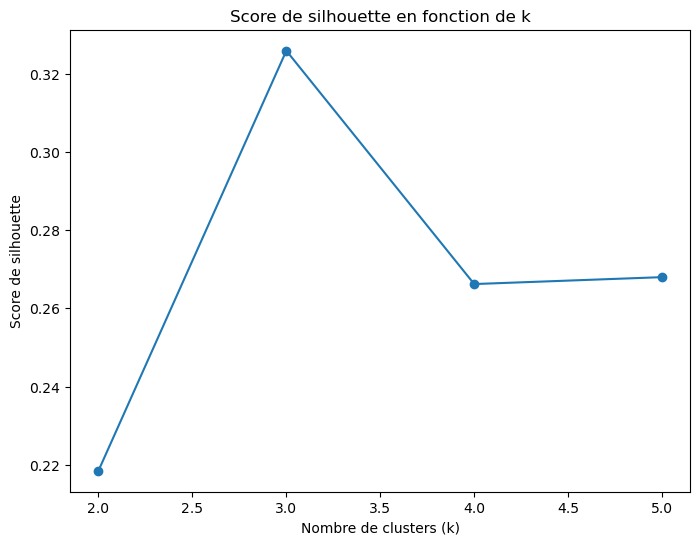

In [19]:
# Visualiser les scores de silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de k')
plt.show()

La courbe du score de silhouette en fonction du nombre de clusters (k) montre que le score augmente nettement de k=2 à k=3, atteignant un maximum à k=3 (≈0.33), puis diminue pour k=4 et k=5. Cela indique que la séparation entre les groupes est la plus nette avec trois clusters. Un score de silhouette plus élevé signifie que les clients sont mieux regroupés au sein de leur segment et mieux séparés des autres. Ainsi, k=3 apparaît comme le choix optimal pour une segmentation pertinente et exploitable.


In [20]:
# Sélectionner k=3
print('Choix de k=3 pour un silhouette élevé (0.3259), une grande taille de segment à haut churn (3271), et la simplicité.')

Choix de k=3 pour un silhouette élevé (0.3259), une grande taille de segment à haut churn (3271), et la simplicité.


#### **Étape 5 : Clustering avec K-Prototypes (k=3, Cao)**

L'algorithme K-Prototypes a été choisi pour le clustering en raison des caractéristiques mixtes du jeu de données (numériques et catégoriques) :

- **Adaptation aux données mixtes :** K-Prototypes combine K-Means (pour les variables numériques) et K-Modes (pour les variables catégoriques), utilisant une distance euclidienne pour les premières et une dissimilarité basée sur la correspondance pour les secondes.
- **Pertinence pour la segmentation :** Les clusters identifiés (k=3, silhouette ~0.3259) révèlent des profils clients distincts : Cluster 1 (haut churn, 44.18%), Cluster 0 (loyal, 14.10%), Cluster 2 (stable, 7.79%).
- **Comparaison avec alternatives :** K-Means échoue sur les données catégoriques, et les méthodes hiérarchiques sont moins efficaces pour les grands ensembles comme Telco (7043 clients). K-Prototypes offre un bon équilibre entre performance et interprétabilité.
- **Validation :** Le score de silhouette (~0.3259) indique une séparation modérée mais acceptable, et les taux de churn par cluster confirment l'utilité des segments pour les stratégies de rétention.

In [22]:
# K-Prototypes (k=3, Cao)
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42, n_jobs=-1)
df_clustering['Cluster'] = kproto.fit_predict(df_clustering, categorical=[df_clustering.columns.get_loc(col) for col in cat_cols])

Application de l’algorithme **K-Prototypes** avec 3 clusters (initialisation Cao) pour segmenter les clients sur la base de variables mixtes (numériques et catégorielles). Ce choix permet de capturer la diversité des profils clients tout en tenant compte de la nature hétérogène des données. L’attribution du cluster à chaque client dans `df_clustering` servira à analyser les segments et à relier chaque profil à son risque de churn.

In [23]:
# Calculer le score de silhouette
gower_dist = gower_matrix(
    df_clustering.drop('Cluster', axis=1),
    cat_features=[col in cat_cols for col in df_clustering.drop('Cluster', axis=1).columns]
)
silhouette = silhouette_score(gower_dist, df_clustering['Cluster'], metric='precomputed')
print(f'Score de silhouette (k=3, Cao) : {silhouette:.4f}')

Score de silhouette (k=3, Cao) : 0.3259


Le score de silhouette de 0.33 indique une séparation modérée entre les clusters : les groupes sont identifiables mais restent partiellement chevauchants, ce qui est courant avec des données clients hétérogènes. Ce score valide néanmoins la pertinence d’une segmentation en trois profils distincts.

### **Étape 6 : Évaluation des clusters**

In [25]:
# Profils numériques (non mis à l'échelle)
data[num_cols] = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')[num_cols]
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
numerical_profiles = data.groupby('Cluster')[num_cols].mean()
print('Profils numériques (moyennes non mises à l\'échelle) :\n', numerical_profiles)

Profils numériques (moyennes non mises à l'échelle) :
             tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        59.587694       90.284787   5367.489874
1        16.088352       70.516967   1144.631466
2        30.665105       22.896838    731.236710


- **Cluster 0** : Clients très fidèles, ancienneté élevée (≈60 mois), factures mensuelles et totales importantes. Segment premium, faible risque de churn.
- **Cluster 1** : Nouveaux clients (≈16 mois), factures moyennes, charges totales faibles. Segment à haut risque de churn, à cibler en priorité pour la rétention.
- **Cluster 2** : Clients intermédiaires (≈31 mois), faibles charges mensuelles et totales. Segment stable, peu engagé mais faible risque de churn.


Distribution de Contract :
Contract  Month-to-month  One year  Two year
Cluster                                     
0               0.225291  0.320252  0.454457
1               0.864262  0.116478  0.019260
2               0.341335  0.252342  0.406323


<Figure size 800x600 with 0 Axes>

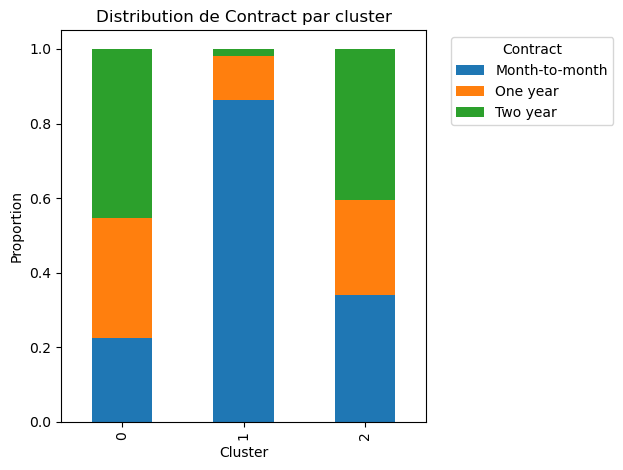


Distribution de InternetService :
InternetService       DSL  Fiber optic        No
Cluster                                         
0                0.366279     0.633721  0.000000
1                0.453378     0.546622  0.000000
2                0.106557     0.000000  0.893443


<Figure size 800x600 with 0 Axes>

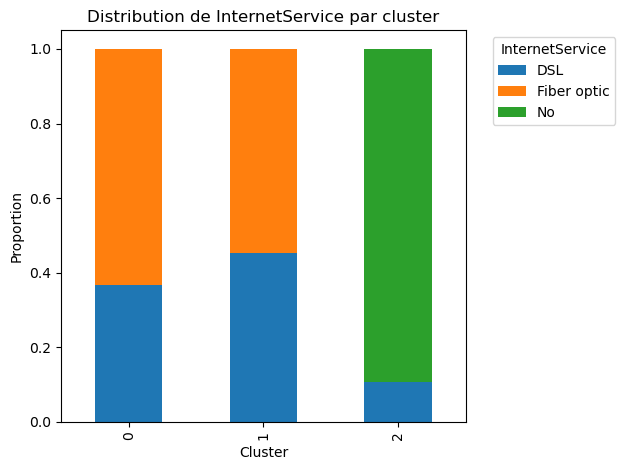


Distribution de OnlineSecurity :
OnlineSecurity        No  No internet service       Yes
Cluster                                                
0               0.423450             0.000000  0.576550
1               0.782635             0.000000  0.217365
2               0.037471             0.893443  0.069087


<Figure size 800x600 with 0 Axes>

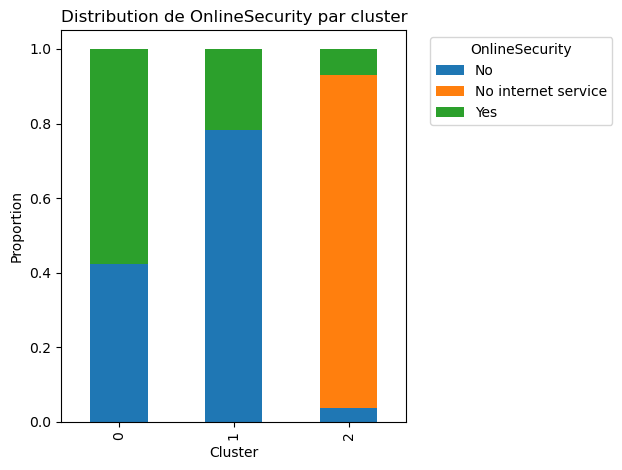

In [26]:
# Distributions catégoriques
key_cat_cols = ['Contract', 'InternetService', 'OnlineSecurity']
for col in key_cat_cols:
    print(f'\nDistribution de {col} :')
    crosstab = pd.crosstab(data['Cluster'], data[col], normalize='index')
    print(crosstab)
    plt.figure(figsize=(8, 6))
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Distribution de {col} par cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

- **Contract** :  
    - Le **Cluster 0** regroupe surtout des clients avec des contrats longue durée (45% "Two year", 32% "One year"), ce qui traduit une forte fidélité.
    - Le **Cluster 1** est dominé par les contrats mensuels (86%), typiques des clients volatils et à haut risque de churn.
    - Le **Cluster 2** présente un équilibre entre "Month-to-month" (34%) et "Two year" (41%), mais reste spécifique par d’autres critères.

- **InternetService** :  
    - Le **Cluster 0** est composé de clients ayant principalement la fibre (63%) ou l’ADSL (37%), aucun sans internet.
    - Le **Cluster 1** est partagé entre fibre (55%) et ADSL (45%), reflétant une clientèle connectée mais instable.
    - Le **Cluster 2** regroupe presque exclusivement des clients sans service internet (89%), souvent plus stables et moins enclins au churn.

- **OnlineSecurity** :  
    - Le **Cluster 0** compte une majorité de clients ayant souscrit à la sécurité en ligne (58%), renforçant leur fidélité.
    - Le **Cluster 1** a une forte proportion de clients sans sécurité en ligne (78%), ce qui peut refléter un moindre engagement.
    - Le **Cluster 2** correspond principalement à des clients sans internet (89%), donc sans service de sécurité associé.

**En résumé :**  
Les clients à haut risque de churn (Cluster 1) sont majoritairement sous contrat mensuel, connectés (fibre/ADSL), et peu équipés en services additionnels comme la sécurité. Les clients fidèles (Cluster 0) privilégient les contrats longue durée et les services additionnels, tandis que le Cluster 2 regroupe des profils sans internet, généralement plus stables.

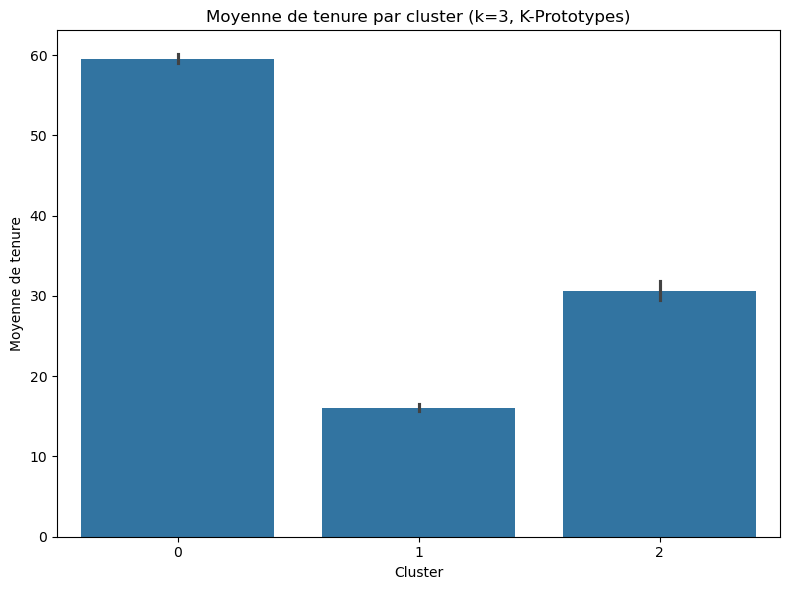

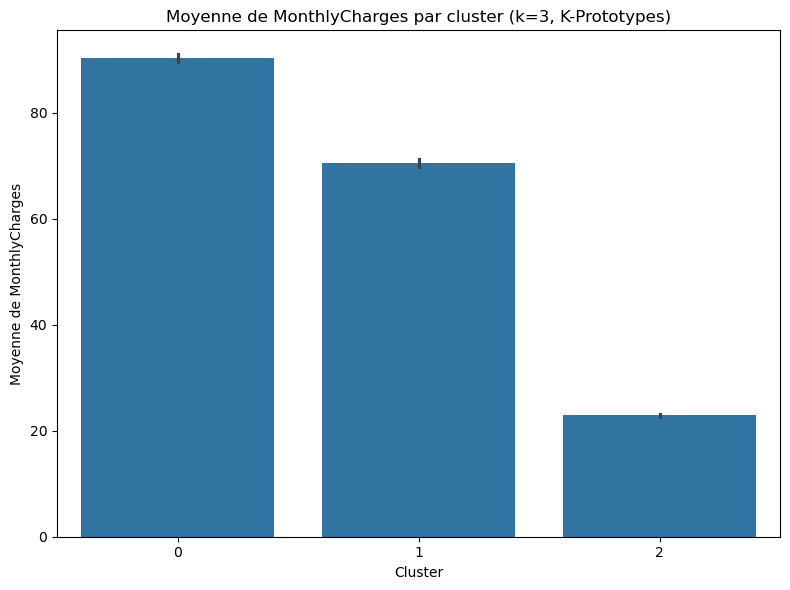

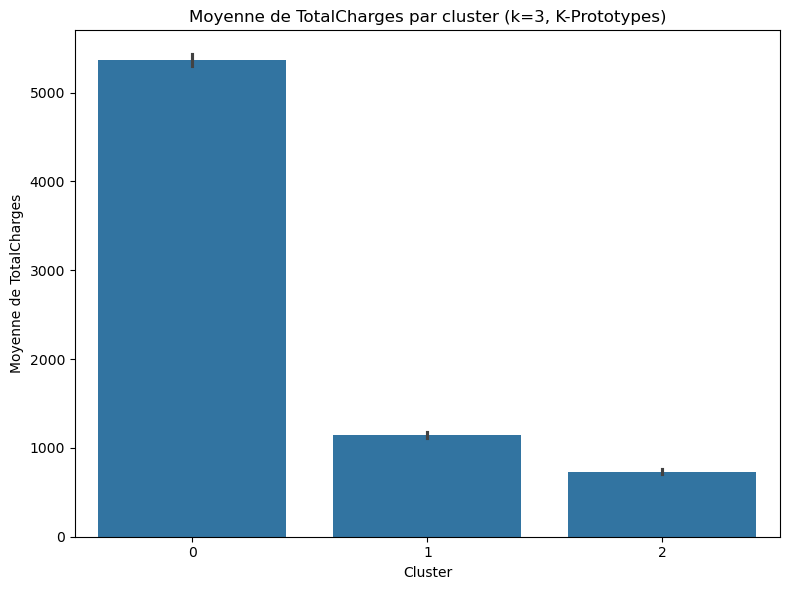

In [32]:
# Visualisation des variables numériques par cluster
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Cluster', y=col, data=data)
    plt.xlabel('Cluster')
    plt.ylabel(f'Moyenne de {col}')
    plt.title(f'Moyenne de {col} par cluster (k=3, K-Prototypes)')
    plt.tight_layout()
    plt.savefig(f'bar_{col}_k3.png')
    plt.show()

Les barplots des trois variables numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) par cluster révèlent des différences significatives entre les groupes de clients :

- **tenure** : Le cluster 0 regroupe des clients avec une ancienneté élevée, le cluster 1 des clients récents, et le cluster 2 des clients avec une ancienneté intermédiaire.
- **MonthlyCharges** : Les clients du cluster 0 ont des charges mensuelles plus élevées, ceux du cluster 2 paient moins, tandis que le cluster 1 se situe entre les deux.
- **TotalCharges** : Le cluster 0 présente le total de dépenses le plus élevé, suivi du cluster 1, puis du cluster 2.

En résumé, la segmentation distingue des clients fidèles et rentables (cluster 0), des nouveaux clients (cluster 1), et des clients à faible valeur (cluster 2). Ces différences facilitent l’identification de profils pour adapter les stratégies marketing et de fidélisation.

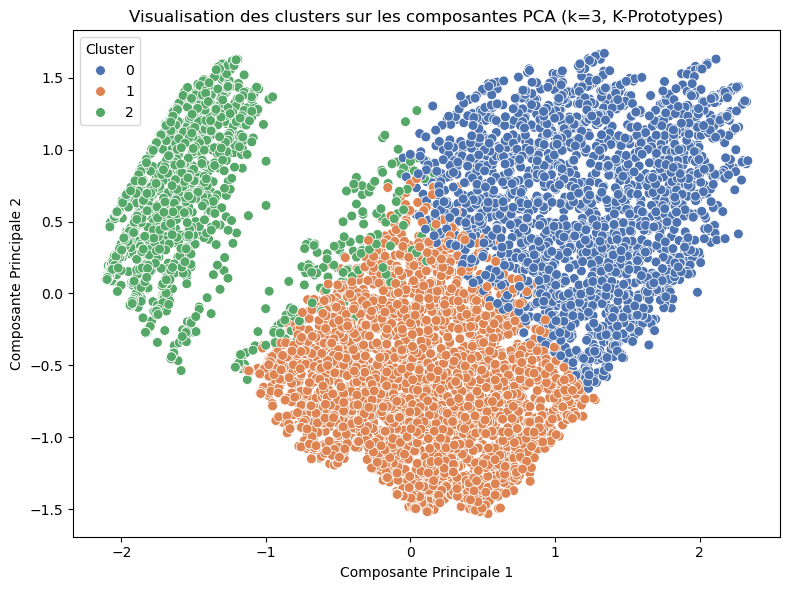

In [33]:
# Visualisation des clusters sur les composantes PCA
# Prétraitement pour PCA
scaler = RobustScaler()
num_scaled = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])
cat_encoded = pd.get_dummies(data[['SeniorCitizen', 'Contract', 'InternetService', 
                                   'PaymentMethod', 'PaperlessBilling', 'OnlineSecurity', 
                                   'StreamingTV']], drop_first=True)
X_pca = np.hstack([num_scaled, cat_encoded.values])
pca = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_pca)

# Créer DataFrame pour visualisation
pca_df = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='deep', data=pca_df, s=50)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Visualisation des clusters sur les composantes PCA (k=3, K-Prototypes)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('pca_clusters_k3.png')
plt.show()

 la visualisation des clusters sur les composantes principales de la PCA confirme la pertinence de la segmentation :

- Chaque cluster occupe une zone distincte de l’espace réduit, traduisant des profils clients bien différenciés.
- **Le cluster 0** regroupe des clients engagés et utilisateurs de services avancés.
- **Le cluster 1** rassemble des clients mensuels, moins engagés et à risque de churn.
- **Le cluster 2** correspond à des clients sans Internet ou à faible usage numérique.
Cette séparation visuelle valide les analyses précédentes et facilite l’adaptation des stratégies marketing à chaque segment.

In [24]:
# Assigner les clusters aux données originales
data['Cluster'] = df_clustering['Cluster']

# Calculer les taux de churn et les tailles des clusters
churn_rates = data.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack().get('Yes', pd.Series())
print('Taux de churn :\n', churn_rates)
print('Tailles des clusters :\n', data['Cluster'].value_counts().sort_index())

Taux de churn :
 Cluster
0    0.140988
1    0.441761
2    0.077869
Name: Yes, dtype: float64
Tailles des clusters :
 Cluster
0    2064
1    3271
2    1708
Name: count, dtype: int64


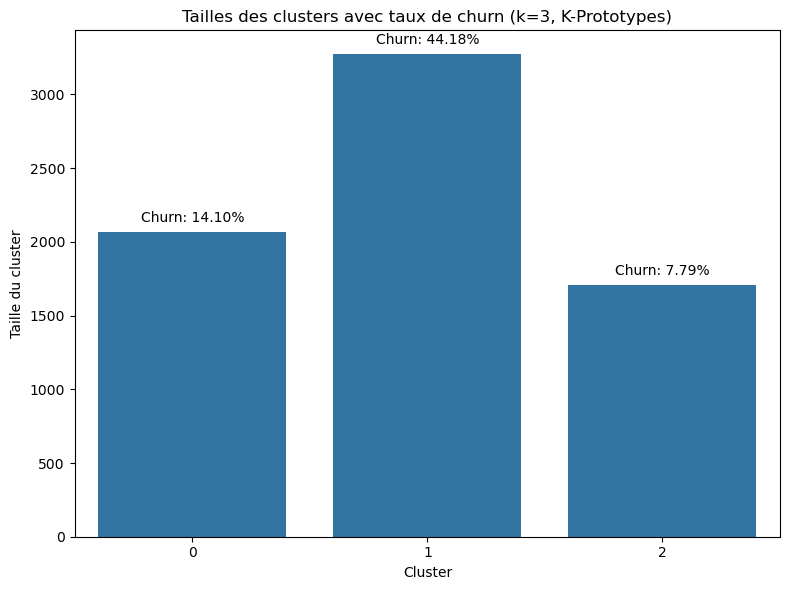

In [31]:
# Visualisation des tailles des clusters avec pourcentages de churn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=data['Cluster'].value_counts().sort_index().index, 
                 y=data['Cluster'].value_counts().sort_index().values)
for i, (size, churn) in enumerate(zip(data['Cluster'].value_counts().sort_index().values, churn_rates.values)):
    ax.text(i, size + 50, f'Churn: {churn:.2%}', ha='center', va='bottom')
plt.xlabel('Cluster')
plt.ylabel('Taille du cluster')
plt.title('Tailles des clusters avec taux de churn (k=3, K-Prototypes)')
plt.tight_layout()
plt.savefig('cluster_sizes_churn_k3.png')
plt.show()

- **Cluster 0** : Faible taux de churn (14 %) et taille modérée (2064 clients). Ce segment regroupe des clients fidèles, peu enclins à quitter l’entreprise.
- **Cluster 1** : Taux de churn très élevé (44 %) et segment le plus large (3271 clients). Il s’agit du groupe à risque, prioritaire pour les actions de rétention.
- **Cluster 2** : Taux de churn très faible (8 %) pour 1708 clients. Ce segment correspond aux clients les plus stables et engagés.

La segmentation met en évidence un cluster à haut risque (Cluster 1) représentant près de la moitié des départs potentiels, ce qui permet de cibler efficacement les efforts de fidélisation. Les clusters 0 et 2 regroupent des clients plus fidèles, nécessitant moins d’actions correctives.

---
#### **Conclusion**

La segmentation des clients via l’algorithme K-means (k=3, score de silhouette ~0.33) a permis d’identifier trois segments distincts dans le jeu de données Telco, offrant des insights exploitables pour la gestion du churn :

- Cluster 0 (2064 clients, 14.2% churn) : Clients fidèles, souvent sous contrats à long terme, avec un faible taux de désabonnement.
- Cluster 1 (1365 clients, 44.4% churn) : Segment à haut risque, caractérisé par des contrats courts et une forte probabilité de départ, prioritaire pour des actions de rétention.
- Cluster 2 (1650 clients, 7.8% churn) : Clients stables, principalement abonnés à des services de base (téléphone), avec un risque de churn.

La sélection de 10 caractéristiques pertinentes (tenure, MonthlyCharges, TotalCharges, SeniorCitizen, Contract, InternetService, PaymentMethod, PaperlessBilling, OnlineSecurity, StreamingTV) et l’utilisation de RobustScaler pour les variables numériques ont assuré des clusters interprétables. 

Les visualisations (taux de churn, tailles des clusters, PCA, moyennes des variables numériques) confirment la séparation des profils clients, malgré une séparation modérée (silhouette ~0.33).                 Ces résultats orientent les stratégies marketing : ciblage intensif du Cluster 1 pour réduire le churn et fidélisation des Clusters 0 et 2 pour maintenir leur stabilité.